<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº0
#### Nicolás Sewrjugin


# Introducción
En este programa, se creó una función que genera señales senoidales a través de ciertos parámetros que se pueden ir variando:

1. la amplitud máxima de la senoidal (volts): vmax.
    
2. su valor medio (volts): dc.
    
3. la frecuencia (Hz): ff.
    
4. la fase (radianes): ph.
    
5. la cantidad de muestras digitalizada por el ADC (# muestras): nn.
    
6. la frecuencia de muestreo del ADC: fs.

    Además, se graficaron dichas funciones para distintas frecuencias y así poder observar los cambios.

# Código para una frecuencia senoidal básica

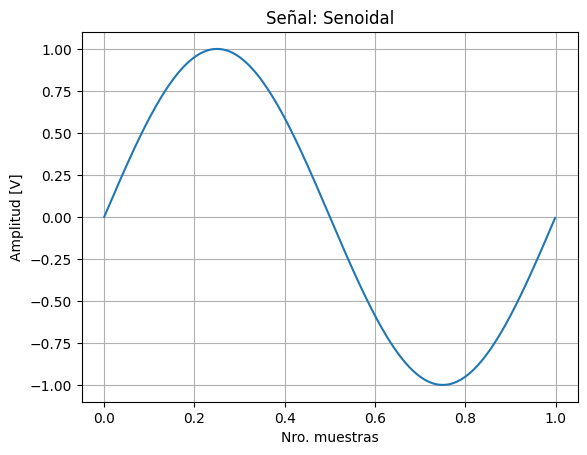

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos generales de la simulación
def mi_funcion_sen( vmax, dc, ff, ph, nn, fs): 
    
    df = fs/nn # resolución espectral
    
    tt = np.linspace(0, 1/df, nn, endpoint=False) # empieza en 0, va hasta 1/df=N*ts y teniendo N muestras para el paso (el endpoint en False hace que no incluya el valor final)
    
    xx = vmax*np.sin(2*np.pi*ff*tt+ph)+dc 
    
    return tt,xx

N = 1000  # cantidad de muestras
fs= N # frecuecia de muestreo, igualandolo a N logramos que el valor maximo sea 1
t,x = mi_funcion_sen(1, 0, 1, 0, N, fs) #sumo pi/2 en la fase para ver que use los maximos
#  Presentación gráfica de los resultados
plt.figure(1)
line_hdls = plt.plot(t, x)
plt.title('Señal: Senoidal' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()



# Retomamos el código para distintas frecuencias de la función

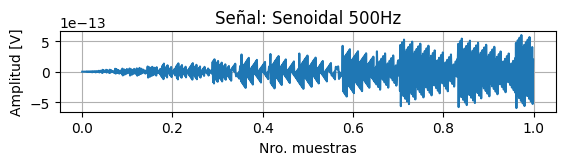

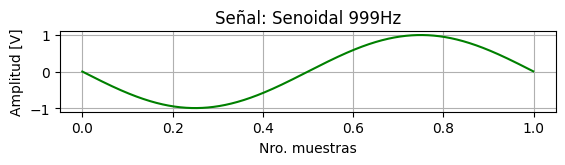

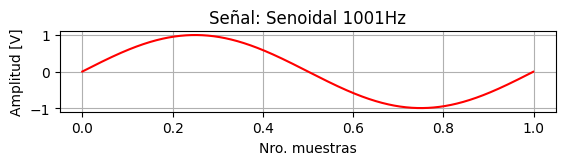

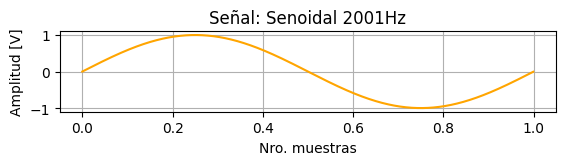

In [5]:
t1, x1 = mi_funcion_sen(1, 0, 500, 0, N, fs)
t2, x2 = mi_funcion_sen(1, 0, 999, 0, N, fs)
t3, x3 = mi_funcion_sen(1, 0, 1001, 0, N, fs)
t4, x4 = mi_funcion_sen(1, 0, 2001, 0, N, fs)

plt.figure(2)
plt.subplot(4,1,1)
plt.plot(t1, x1)
plt.title('Señal: Senoidal 500Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()

plt.subplot(4,1,2)
plt.plot(t2, x2, color='green')
plt.title('Señal: Senoidal 999Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()

plt.subplot(4,1,3)
plt.plot(t3, x3, color='red')
plt.title('Señal: Senoidal 1001Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()

plt.subplot(4,1,4)
plt.plot(t4, x4, color='orange')
plt.title('Señal: Senoidal 2001Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()


# ¿Y si utilizamos la fase $\pi/2$?

Vemos en los gráficos que para la frecuencia de *500Hz* y de *999Hz*, hay cierta cuestión a corregir. En la primera, tenemos valores muy cercanos al *0* (casi nulo) para el *eje y*. Mientras que, en la segunda, notamos que la función se encuentra invertida. Si desfasamos en $\pi/2$, logramos que tome los valores máximos (picos) para graficar, en vez de los *ceros* de la función.

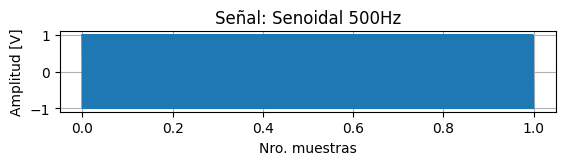

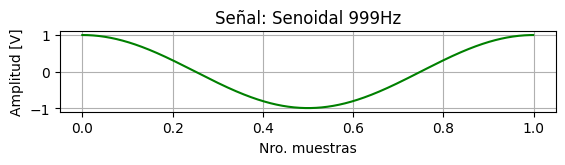

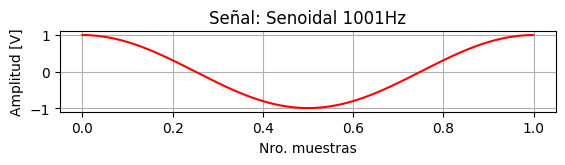

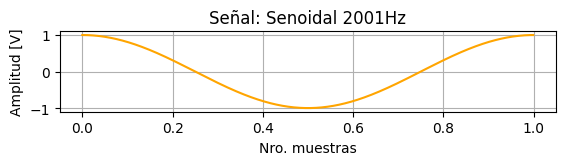

In [6]:
t5, x5 = mi_funcion_sen(1, 0, 500, np.pi/2, N, fs)
t6, x6 = mi_funcion_sen(1, 0, 999, np.pi/2, N, fs)
t7, x7 = mi_funcion_sen(1, 0, 1001, np.pi/2, N, fs)
t8, x8 = mi_funcion_sen(1, 0, 2001, np.pi/2, N, fs)

plt.figure(2)
plt.subplot(4,1,1)
plt.plot(t5, x5)
plt.title('Señal: Senoidal 500Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()

plt.subplot(4,1,2)
plt.plot(t6, x6, color='green')
plt.title('Señal: Senoidal 999Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()

plt.subplot(4,1,3)
plt.plot(t7, x7, color='red')
plt.title('Señal: Senoidal 1001Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()

plt.subplot(4,1,4)
plt.plot(t8, x8, color='orange')
plt.title('Señal: Senoidal 2001Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()
    

# Conclusiones
   En los gráficos, se puede apreciar cómo, al variar la frecuencia, se influye en la reconstrucción de la representación de la función.
   En relación a esto, el *Teorema de Nyquist-Shannon* exhibe que para obtener una visualización coherente de la señal, la frecuencia de muestreo *fs* utilizada debe de ser mayor al doble de la frecuencia de base utilizada *f0*:
\begin{equation}
fs > 2 f0
\end{equation} 
   Si mantenemos los valores dentro de los parámetros de esta ecuación, se logra que no haya redundancia y no ocurran solapamientos. 
   Sin embargo, en el caso límite de *fs=2f0* (*500Hz*), al usar la misma frecuencia y utilizar las muestras en los ceros (en vez de en los máximos), lo que se obtiene son prácticamente todos valores nulos para el *eje y*, ya que quedaría la senoidal dispuesta de la siguiente manera:
\begin{equation}
sen(2\pi f0t)=sen(2\pi f0\frac{N}{fs})=sen(2\pi f0\frac{N}{2f0})=sen(\pi N)=0
\end{equation} 
   Por eso, se desfasa $\pi/2$ para que se usen los valores de los máximos de la función y poder observar en mayor detalle. Aunque, igualmente, no se consigue percibir perfectamente la senoidal. Por lo tanto, se llega a la conclusión que *fs* debe ser mucho mayor que el doble de *f0*.
   Por el contrario, si excedemos el límite de la frecuencia de Nyquist-Shannon, empiezan a ocurrir solapamientos y las señales parecerían tener otras frecuencias: las frecuencias altas se comportan como las frecuencias bajas. Así es como para frecuencias de *999Hz*, *1001Hz* y *2001Hz*, sus gráficos se observan como si fueran de frecuencia *1Hz*. Esta frecuencia aparente se materializa en la siguiente ecuación:
\begin{equation}
fa=|f-kfs| 
\end{equation}  
   Si se toma *k=1*, para *999Hz* y *1001Hz*, obtendríamos *fa=1Hz*. La diferencia es que la primera, si examinemos dentro del módulo, quedaría *-1Hz*. Es por esto que, unas líneas más arriba, se observaba su gráfico invertido.
   Para *2001Hz*, se debería tomar *k=2* (porque con *k=1* se superaría la frecuencia de Nyquist-Shannon), apreciando que también arroja el valor de *fa=1Hz*.

# Bonus
Teniendo en cuenta la ecuación de la frecuencia aparente, si utilizamos *k=2* para *f0=2002Hz*, se debería obtener un gráfico como el de la frecuencia de *2Hz*.

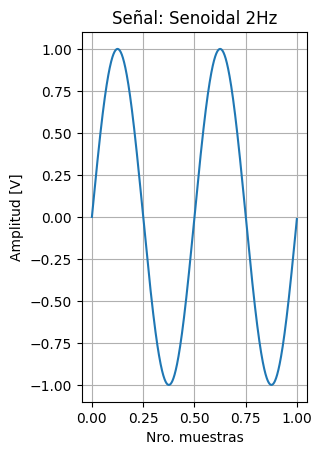

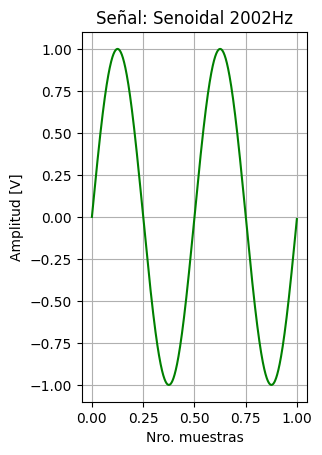

In [7]:
t9, x9 = mi_funcion_sen(1, 0, 2, 0, N, fs)
t10, x10 = mi_funcion_sen(1, 0, 2002, 0, N, fs)

plt.figure(3)
plt.subplot(1,2,1)
plt.plot(t9, x9)
plt.title('Señal: Senoidal 2Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()

plt.subplot(1,2,2)
plt.plot(t10, x10, color='green')
plt.title('Señal: Senoidal 2002Hz' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()